In [1]:
from sklearn.utils.multiclass import unique_labels
from typing import Dict
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, \
    balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Загрузка датасета
covid = pd.read_csv('./Cleaned-Data.csv', sep=",")

In [3]:
# Вывод первых пяти строк
covid.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
# Удаление строк, где страна - не Китай
names = covid[covid['Country'] != 'China'].index
covid.drop(names, inplace=True)

In [5]:
covid.shape

(31680, 27)

In [6]:
# Названия типов данных
covid.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [7]:
# Типы данных
covid.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     int64
Age_10-19                   int64
Age_20-24                   int64
Age_25-59                   int64
Age_60+                     int64
Gender_Female               int64
Gender_Male                 int64
Gender_Transgender          int64
Severity_Mild               int64
Severity_Moderate           int64
Severity_None               int64
Severity_Severe             int64
Contact_Dont-Know           int64
Contact_No                  int64
Contact_Yes                 int64
Country                    object
dtype: object

In [8]:
# le = LabelEncoder()
# games['Gender'] = le.fit_transform(games['Gender'])
# games['Medal'] = le.fit_transform(games['Medal'])
# games['Country'] = le.fit_transform(games['Country'])
# games['City'] = le.fit_transform(games['City'])
# games['Sport'] = le.fit_transform(games['Sport'])
# games['Discipline'] = le.fit_transform(games['Discipline'])

In [9]:
# Статистические данные
covid.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,31680.00000,31680.000000,31680.000000,31680.000000,31680.00000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,...,31680.000000,31680.000000,31680.000000,31680.00000,31680.00000,31680.00000,31680.00000,31680.000000,31680.000000,31680.000000
mean,0.31250,0.500000,0.562500,0.500000,0.31250,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.25000,0.25000,0.25000,0.25000,0.333333,0.333333,0.333333
std,0.46352,0.500008,0.496086,0.500008,0.46352,0.242065,0.481053,0.497937,0.497937,0.481053,...,0.471412,0.471412,0.471412,0.43302,0.43302,0.43302,0.43302,0.471412,0.471412,0.471412
min,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
50%,0.00000,0.500000,1.000000,0.500000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
75%,1.00000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.25000,0.25000,0.25000,0.25000,1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000


In [10]:
# Количество пустых значений
covid.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [11]:
# Удаление строк, содержащих пустые значения
# games = games.dropna(axis=0, how='any')
# (games.shape)

In [38]:
# Парные диаграммы
sns.pairplot(covid)

Error in callback <function flush_figures at 0x00000224455BE9D8> (for post_execute):


KeyboardInterrupt: 

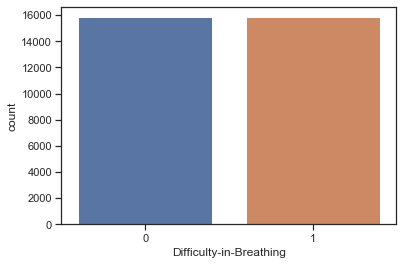

In [13]:
# Дисбаланс классов по затруднению дыхательности деятельности
sns.countplot(covid['Difficulty-in-Breathing'])

In [14]:
covid['Difficulty-in-Breathing'].value_counts()

1    15840
0    15840
Name: Difficulty-in-Breathing, dtype: int64

In [15]:
total = covid.shape
classes = covid['Difficulty-in-Breathing'].value_counts()

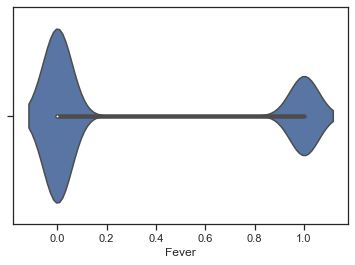

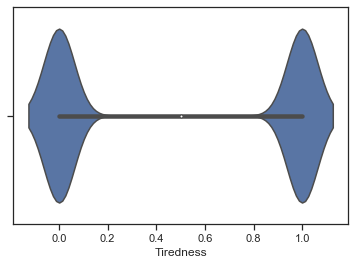

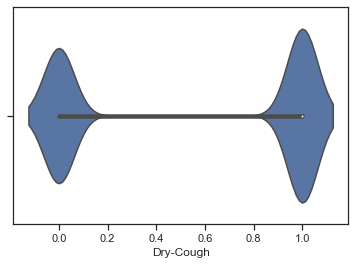

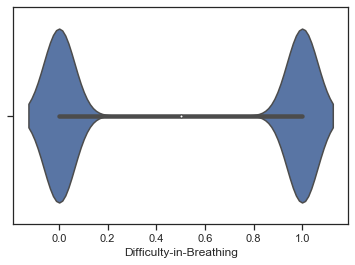

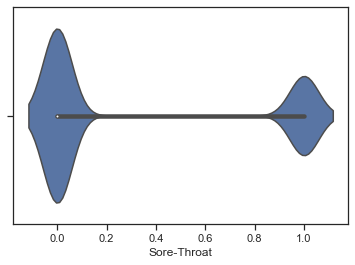

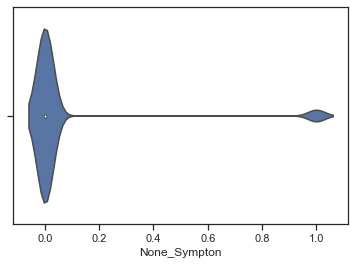

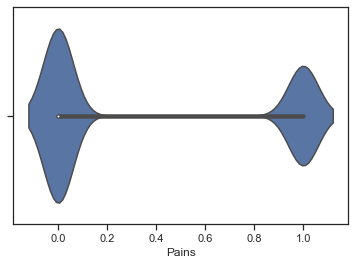

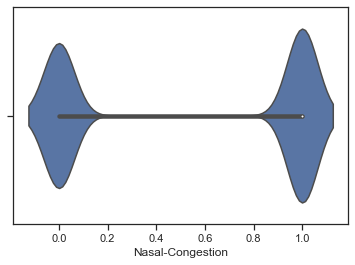

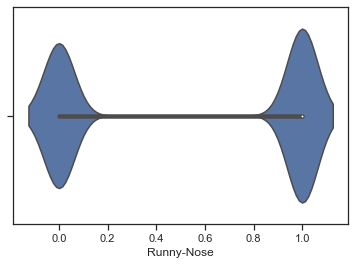

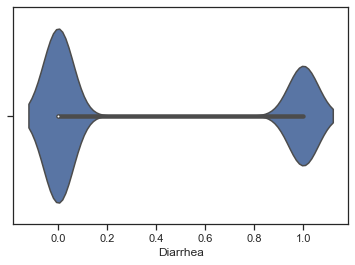

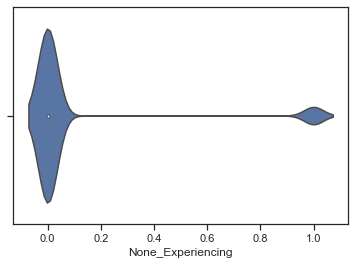

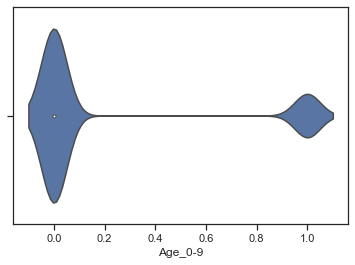

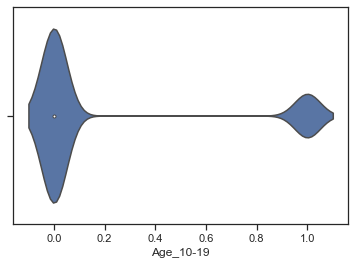

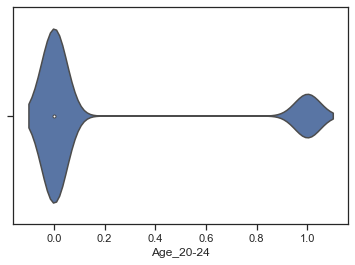

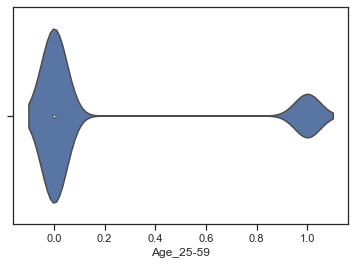

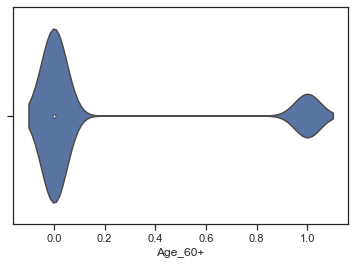

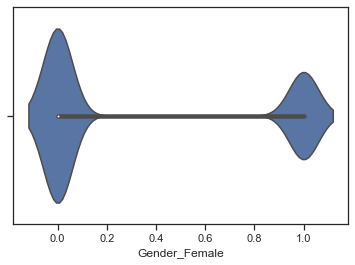

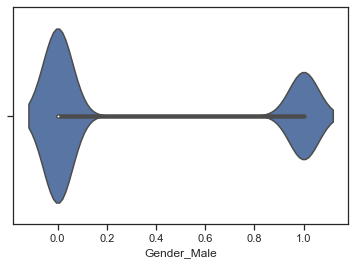

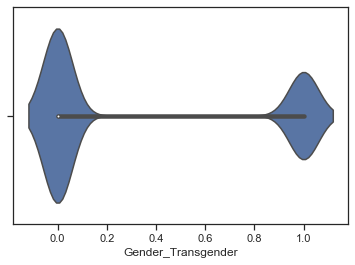

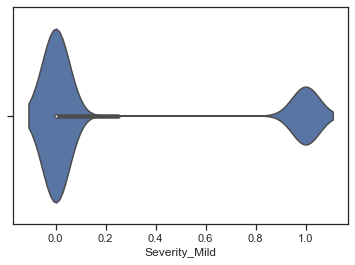

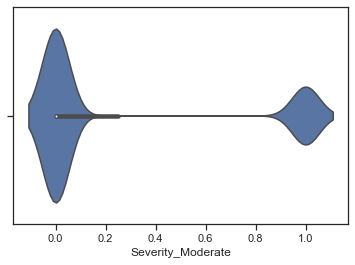

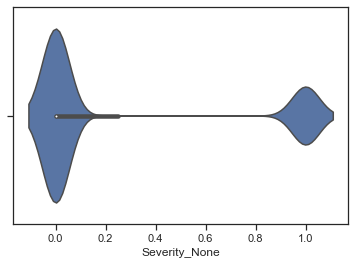

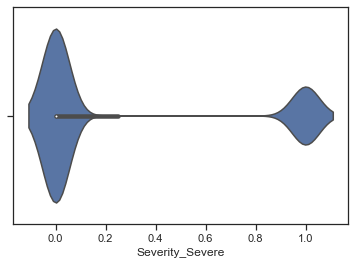

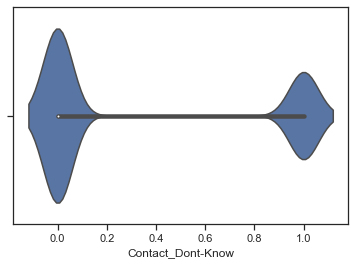

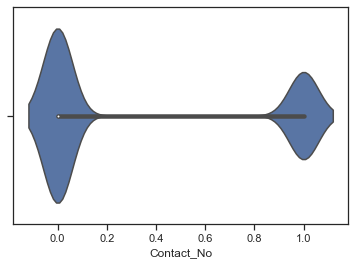

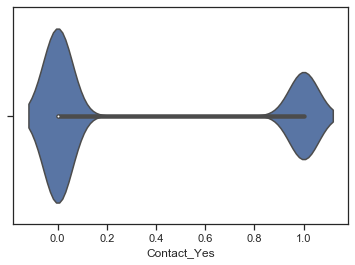

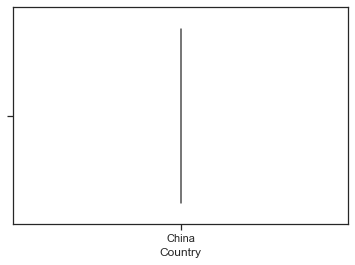

In [19]:
# Скрипичные диаграммы
for col in covid.columns:
    sns.violinplot(x=covid[col])
    plt.show()

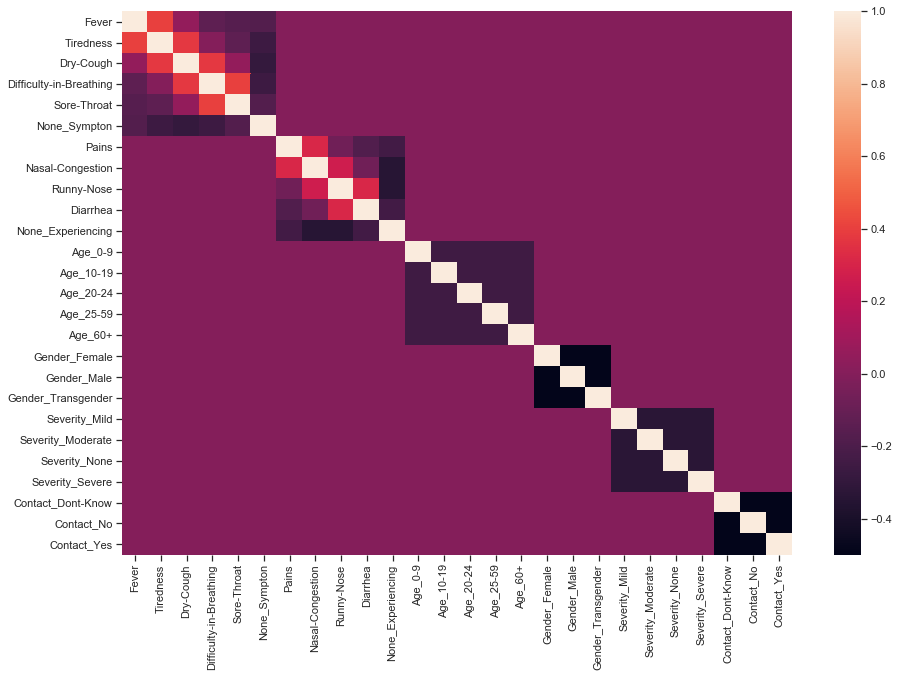

In [37]:
# Матрица корреляции
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(covid.corr())

In [43]:
le = LabelEncoder()
covid['Country'] = le.fit_transform(covid['Country'])

# Подготовка данных
X = covid.drop('Difficulty-in-Breathing', axis = 1)
y = covid['Difficulty-in-Breathing']

# Разделение набора данных на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Применение стандартного масштабирования для оптимизации результата 
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [44]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [45]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [46]:
rfc = RandomForestClassifi0r(n_estimators=10)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Normalized confusion matrix


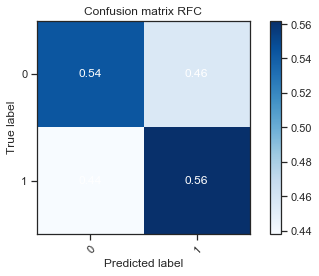

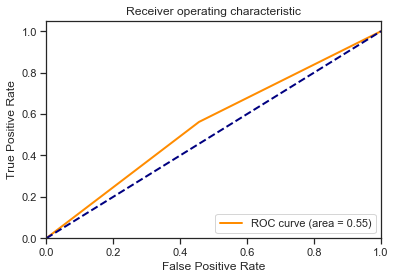

0.5527725476253869

In [47]:
# Оценка результата работы модели
# RandomForest
plot_confusion_matrix(y_test, pred_rfc, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix RFC')
draw_roc_curve(y_test.values, pred_rfc)
balanced_accuracy_score(y_test, pred_rfc)

In [48]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

Normalized confusion matrix


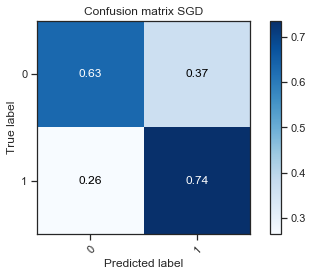

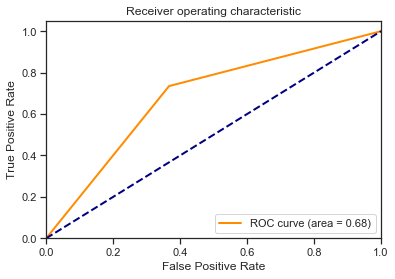

0.6840343154682664

In [49]:
# Оценка результата работы модели
# Стохастический градиентный спуск
plot_confusion_matrix(y_test, pred_sgd, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SGD')
draw_roc_curve(y_test.values, pred_sgd)
balanced_accuracy_score(y_test, pred_sgd)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

Normalized confusion matrix


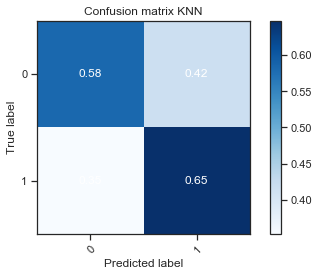

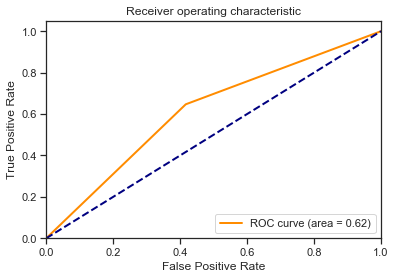

0.6151008626695725

In [51]:
# Оценка результата работы модели
# Ближайшие соседи
plot_confusion_matrix(y_test, pred_knn, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix KNN')
draw_roc_curve(y_test.values, pred_knn)
balanced_accuracy_score(y_test, pred_knn)

In [52]:
gbs = GradientBoostingClassifier()
gbs.fit(X_train, y_train)
pred_gbs = gbs.predict(X_test)

Normalized confusion matrix


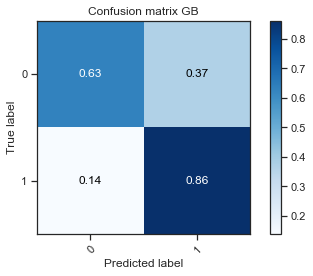

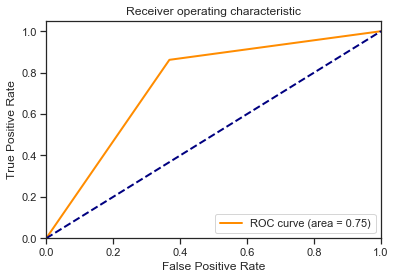

0.7469373715601231

In [53]:
# Оценка результата работы модели
# Градиентный бустинг
plot_confusion_matrix(y_test, pred_gbs, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix GB')
draw_roc_curve(y_test.values, pred_gbs)
balanced_accuracy_score(y_test, pred_gbs)

In [54]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

Normalized confusion matrix


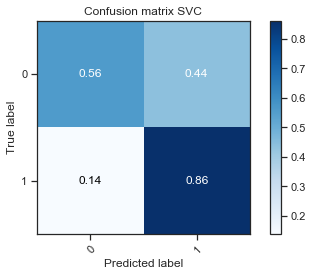

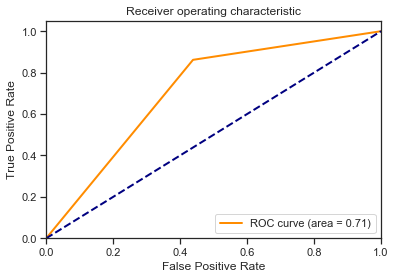

0.7116487893769361

In [55]:
# Оценка результата работы модели
# Метод опорных векторов
plot_confusion_matrix(y_test, pred_svc, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SVC')
draw_roc_curve(y_test.values, pred_svc)
balanced_accuracy_score(y_test, pred_svc)

In [56]:
param_rfc = {'n_estimators':[1, 3, 5, 7, 10, 13, 16, 19],
    'max_depth':[1, 3, 5, 7, 10, 13, 16, 19],
    'random_state':[0, 2, 4, 6, 8, 10, 12, 14]} 
grid_rfc = GridSearchCV(rfc, param_rfc, cv=3, scoring='balanced_accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random

In [57]:
grid_rfc.best_params_

{'max_depth': 3, 'n_estimators': 3, 'random_state': 10}

Normalized confusion matrix


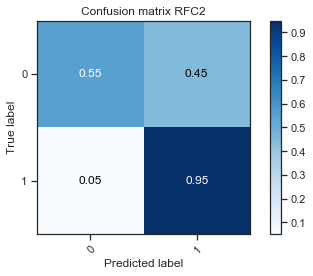

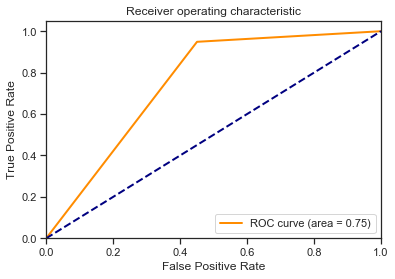

0.7492086349860261

In [64]:
rfc2 = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=10)
rfc2.fit(X_train, y_train)
pred_rfc2 = rfc2.predict(X_test)
plot_confusion_matrix(y_test, pred_rfc2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix RFC2')
draw_roc_curve(y_test.values, pred_rfc2)
balanced_accuracy_score(y_test, pred_rfc2)

In [59]:
param_sgd = {'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]}
grid_sgd = GridSearchCV(sgd, param_sgd, cv=3, scoring='balanced_accuracy')
grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty=None, power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [60]:
grid_sgd.best_params_

{'alpha': 0.5}

Normalized confusion matrix


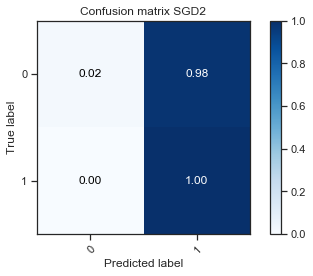

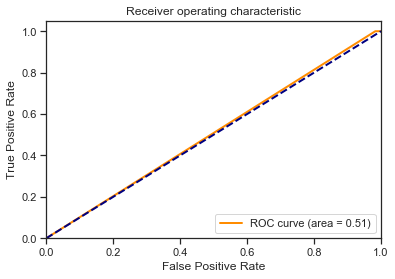

0.5084692597239648

In [65]:
sgd2 = SGDClassifier(alpha=0.5)
sgd2.fit(X_train, y_train)
pred_sgd2 = sgd2.predict(X_test)
plot_confusion_matrix(y_test, pred_sgd2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SGD2')
draw_roc_curve(y_test.values, pred_sgd2)
balanced_accuracy_score(y_test, pred_sgd2)

In [62]:
n_range = np.array(range(1,100,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
         86, 91, 96])}]

In [63]:
grid_knn = GridSearchCV(knn, tuned_parameters, cv=3, scoring='balanced_accuracy')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=0)

In [66]:
grid_knn.best_params_

{'n_neighbors': 51}

Normalized confusion matrix


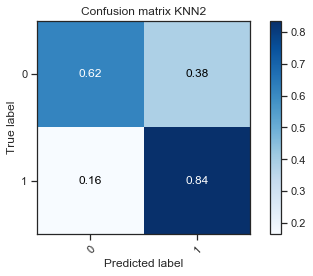

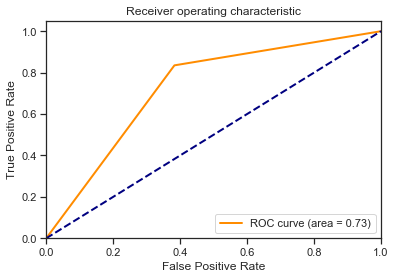

0.7260673363741732

In [67]:
knn2 = KNeighborsClassifier(n_neighbors=51)
knn2.fit(X_train, y_train)
pred_knn2 = knn2.predict(X_test)
plot_confusion_matrix(y_test, pred_knn2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix KNN2')
draw_roc_curve(y_test.values, pred_knn2)
balanced_accuracy_score(y_test, pred_knn2)

In [68]:
param_gbs = {'n_estimators':[1, 3, 5, 7, 10, 13, 16], 
                            'max_depth':[1, 3, 5, 7, 10, 13, 16],
                            'learning_rate':[0.01, 0.05, 0.1, 0.5, 2, 3, 4, 5]}
grid_gbs = GridSearchCV(gbs, param_gbs, scoring='balanced_accuracy', cv=3)
grid_gbs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [69]:
grid_gbs.best_params_

{'learning_rate': 2, 'max_depth': 3, 'n_estimators': 10}

Normalized confusion matrix


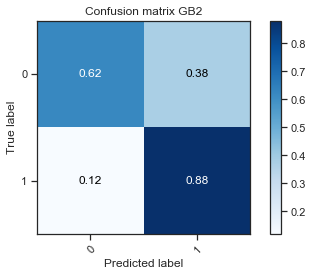

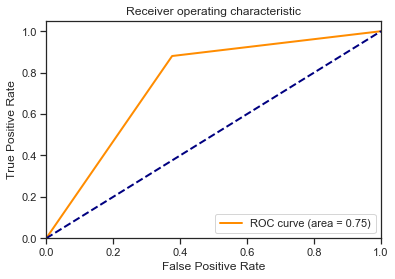

0.7520717780622697

In [72]:
gbs2 = GradientBoostingClassifier(n_estimators=10, max_depth=3, learning_rate=2)
gbs2.fit(X_train, y_train)
pred_gbs2 = gbs2.predict(X_test)
plot_confusion_matrix(y_test, pred_gbs2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix GB2')
draw_roc_curve(y_test.values, pred_gbs2)
balanced_accuracy_score(y_test, pred_gbs2)

In [ ]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='balanced_accuracy', cv=3)
grid_svc.fit(X_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
svc2 = SVC(C = 1.2, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
plot_confusion_matrix(y_test, pred_svc2, 
                      classes=np.array(['0', '1']),
                      normalize=True,
                      title='Confusion matrix SVC2')
draw_roc_curve(y_test.values, pred_svc2)
balanced_accuracy_score(y_test, pred_svc2)